# Create Figures for Final Report

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Leaderboard Scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'Leaderboard Scores over Time')

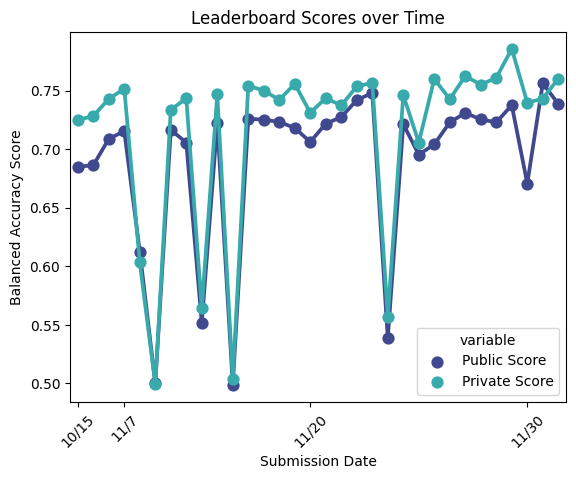

In [59]:
# leaderboard scores dataframe

sub_dates = ["10/15/23 00:00:00", "10/16/23 00:00:00", "10/17/23 00:00:00", "11/07/23 00:00:00", "11/10/23 00:00:00",
             "11/13/23 00:00:00", "11/13/23 12:00:00", "11/14/23 00:00:00", "11/14/23 12:00:00", "11/16/23 00:00:00", 
             "11/19/23 00:00:00", "11/19/23 12:00:00", "11/18/23 00:00:00", "11/18/23 12:00:00",
             "11/20/23 00:00:00", "11/20/23 12:00:00", "11/22/23 00:00:00", "11/24/23 00:00:00", "11/24/23 12:00:00", 
             "11/25/23 00:00:00", "11/25/23 12:00:00", "11/26/23 00:00:00", "11/27/23 00:00:00", 
             "11/27/23 12:00:00", "11/28/23 00:00:00", "11/28/23 12:00:00", "11/29/23 00:00:00", "11/29/23 12:00:00",
             "11/30/23 00:00:00", "11/30/23 8:00:00", "11/30/23 16:00:00", "11/30/23 23:00:00"]
public_score = [0.68504, 0.68614, 0.70873, 0.71533, 0.61252, 0.49997, 0.71638, 0.70558,
                0.55182, 0.72262, 0.4988, 0.72595, 0.72505, 0.7233, 0.718, 0.70611,
                0.72177, 0.72729, 0.74184, 0.74794, 0.53853, 0.72126, 0.6953, 0.70402,
                0.72285, 0.73084, 0.72542, 0.72285, 0.73749, 0.67059, 0.75622, 
                0.73853]
private_score = [0.72493, 0.72819, 0.74287, 0.75143, 0.6033, 0.49963, 0.73347, 0.74343, 
                 0.56442, 0.74671, 0.50357, 0.75409, 0.74997, 0.74199, 0.75573, 0.731,
                 0.7435, 0.73723, 0.75358, 0.75654, 0.55694, 0.74612, 0.70557, 0.75991,
                 0.74261, 0.76234, 0.75502, 0.76084, 0.78559, 0.73959, 0.74307, 0.76014]

public_scores_df = pd.DataFrame({"Submission Date":[datetime.strptime(x, '%m/%d/%y  %H:%M:%S') for x in sub_dates], 
                                 "Public Score":public_score, "Private Score":private_score})
public_scores_df = public_scores_df.melt(["Submission Date"])
sns.pointplot(public_scores_df, x='Submission Date', y='value', hue='variable', palette="mako")
plt.ylabel('Balanced Accuracy Score')
plt.xticks([0, 3, 15, 29],["10/15", "11/7", "11/20", "11/30"], rotation=45)
plt.title('Leaderboard Scores over Time')


## Feature Importances

In [111]:
xgb_feat = pd.read_csv('Submission/Feature Importances/xg_submit_features.csv')
rf_feat = pd.read_csv('Submission/Feature Importances/rf_submit_features.csv')
lr_feat = pd.read_csv('Submission/Feature Importances/lr_submit_features.csv')


In [112]:
xgb_feat[0:5][["Features", "Importances"]]

,Features,Importances
0,adp_dist,0.198647
1,post_test_score,0.050794
2,RL_pre,0.045855
3,pre_skeletal_distance_to_soma,0.043878
4,post_skeletal_distance_to_soma,0.043502


In [113]:
rf_feat[0:5]

,Unnamed: 0,Features,Importances,Model
0,6,adp_dist,0.562631,Random Forest
1,26,RL_pre,0.099358,Random Forest
2,19,pre_nucleus_z,0.039399,Random Forest
3,8,pre_skeletal_distance_to_soma,0.032807,Random Forest
4,11,pre_rf_x,0.032274,Random Forest


In [114]:
lr_feat[0:5]

,Unnamed: 0,Features,Importances,Model
0,13,post_oracle,11.605845,Logistic Regression
1,10,pre_test_score,10.899437,Logistic Regression
2,11,pre_rf_x,2.400079,Logistic Regression
3,6,adp_dist,1.492829,Logistic Regression
4,14,post_test_score,1.378573,Logistic Regression


In [107]:
# standardize to a range of 0 to 1
xgb_feat["Importances"] = (xgb_feat["Importances"]-min(xgb_feat["Importances"]))/(max(xgb_feat["Importances"])-min(xgb_feat["Importances"]))
rf_feat["Importances"] = (rf_feat["Importances"]-min(rf_feat["Importances"]))/(max(rf_feat["Importances"])-min(rf_feat["Importances"]))
lr_feat["Importances"] = (lr_feat["Importances"]-min(lr_feat["Importances"]))/(max(lr_feat["Importances"])-min(lr_feat["Importances"]))
feature_imps = pd.concat([xgb_feat,rf_feat, lr_feat])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'Standardized Feature Importance')

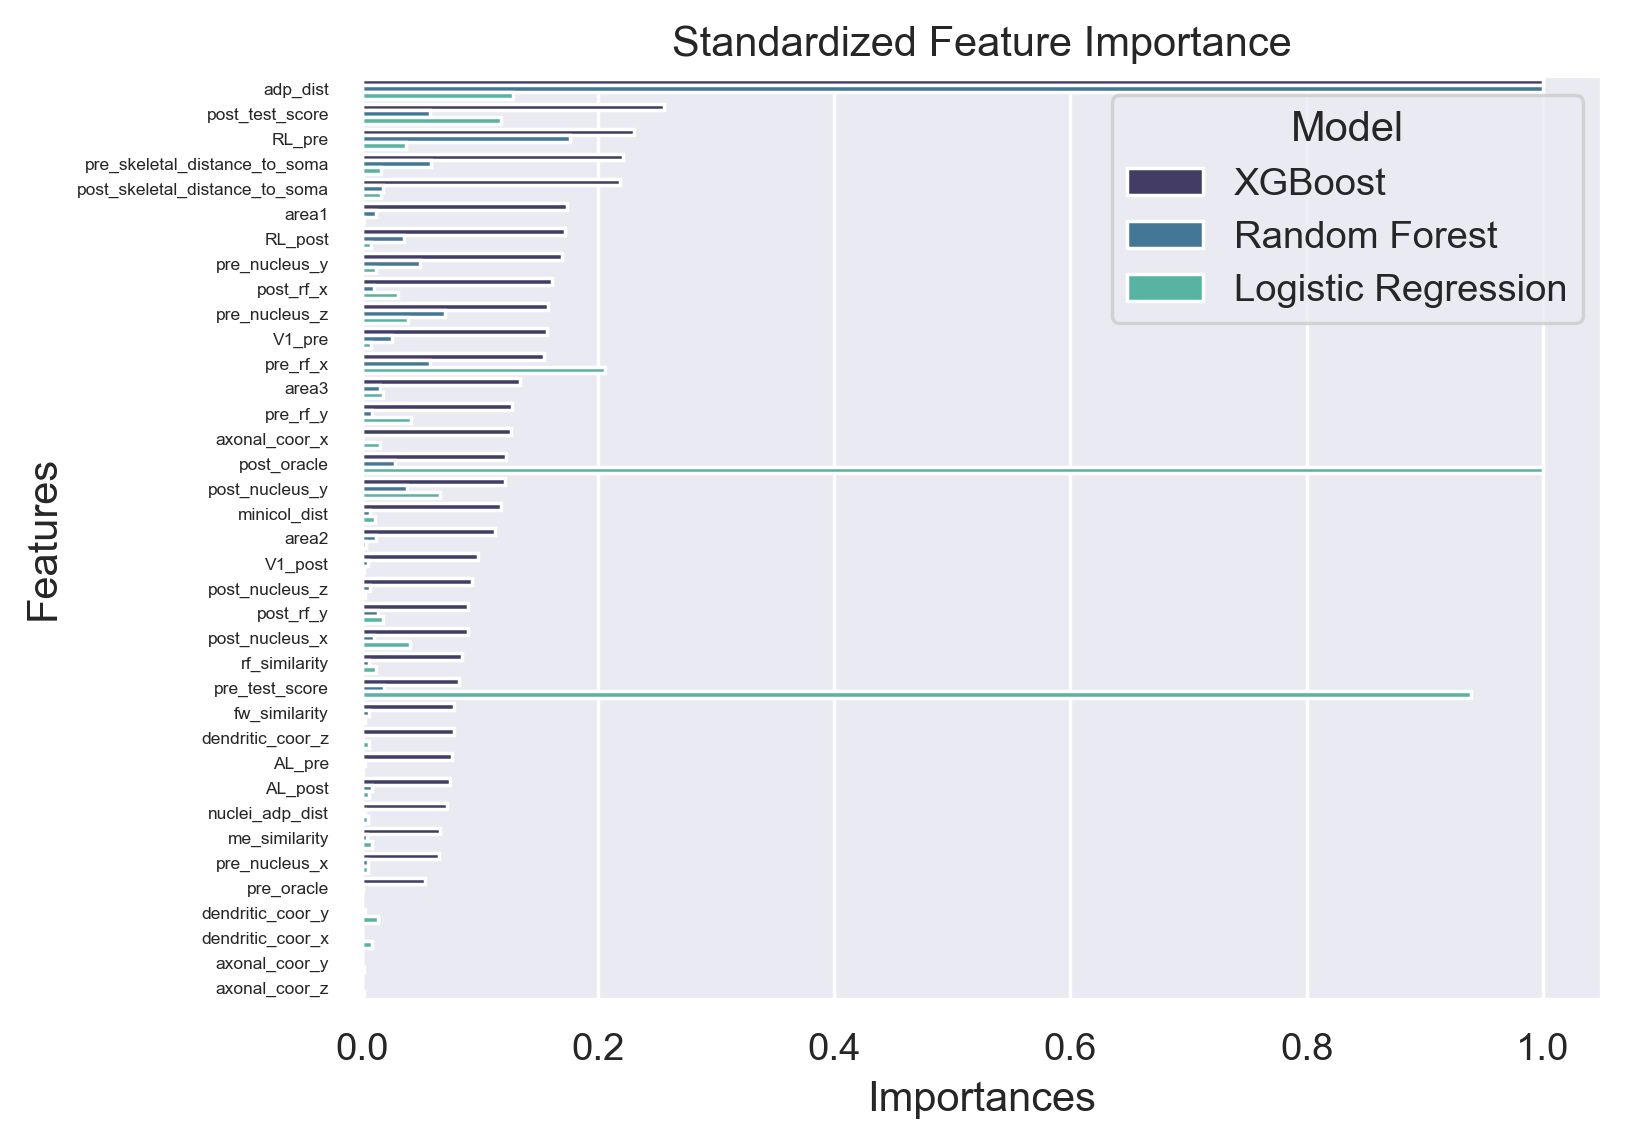

In [82]:
# create plot of feature importances
sns.set_theme(palette='deep')
plt.figure(dpi=250)
g = sns.barplot(feature_imps, y='Features', x='Importances', hue="Model", palette='mako')
g.set_yticklabels(g.get_yticklabels(), fontsize=5)
plt.title("Standardized Feature Importance")

## Pre-RL Figure

In [150]:
train_path = "Data/train_data.csv"
train = pd.read_csv(train_path)

In [141]:
train.drop_duplicates(subset=['pre_nucleus_id'], inplace=True)
train.groupby('pre_brain_area').count()["pre_nucleus_id"]

pre_brain_area
AL    23
RL    33
V1    21
Name: pre_nucleus_id, dtype: int64

In [126]:
train.groupby('pre_brain_area').count()["ID"]

pre_brain_area
AL    42663
RL    69168
V1    74001
Name: ID, dtype: int64

In [127]:
train.groupby('pre_brain_area').sum()["connected"]

pre_brain_area
AL    237
RL    478
V1    651
Name: connected, dtype: int64

In [125]:
train.groupby('pre_brain_area').sum()["connected"]/train.groupby('pre_brain_area').count()["ID"]

pre_brain_area
AL    0.005555
RL    0.006911
V1    0.008797
dtype: float64

## Post-Oracle

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'Post-Oracle Scores of Neurons in Training Data')

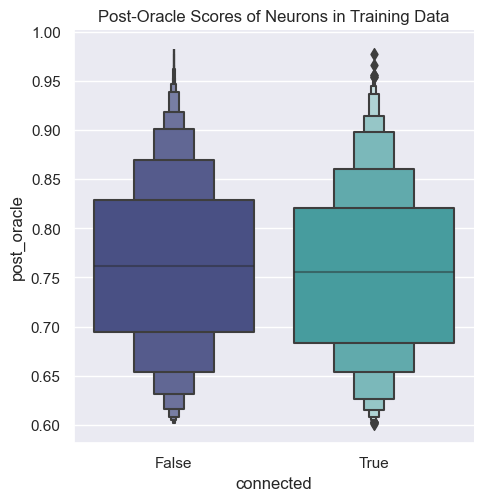

In [155]:
sns.catplot(data=train, x="connected", y='post_oracle', kind="boxen", palette="mako")
plt.title('Post-Oracle Scores of Neurons in Training Data')